# Assignment: week 3
## Objectives
1. to work with image data
2. to experiment with pretrained convnets

## Data understanding and preparation



First pre downloaded cifar 10 imageset is initialized for usage. Trainset is split to 80% of train set and 20% of validation set. Image size is set to 128x128. Cifar 10 image dataset includes 10 classes and 6000 images per class. Images are 32x32 in size.

In [4]:
import os


import matplotlib.pyplot as plt
import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input


from keras import Sequential, layers
import keras_hub
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

batch_size = 32
img_size = (128, 128)
train_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    './CIFAR-10-images/train',
    batch_size=batch_size,
    image_size=img_size,
    label_mode='categorical',
    validation_split=0.2,
    subset='both',
    seed=123)

test_dataset = keras.utils.image_dataset_from_directory(
    './CIFAR-10-images/test',
    batch_size=batch_size,
    image_size=img_size,
    label_mode='categorical')



Found 50000 files belonging to 10 classes.
Using 40000 files for training.
Using 10000 files for validation.
Found 10000 files belonging to 10 classes.


## Pretrained Model

Xpection imagenet pretrained convolution model is used as a base model with frozen weights and without top dense levels

In [6]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 63, 63,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 63, 63,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 63, 63,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 61, 61,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 61, 61,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 61, 61,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 61, 61,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 61, 61,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 61, 61,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 61, 61,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 61, 61,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 31, 31,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 31, 31,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 31, 31,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 31, 31,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 31, 31,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

## Extracting Features

Then, feature extraction is performed using the pretrained Xception model.
In this step, each image is passed through the convolutional base, and the model outputs high-level feature maps representing the most significant visual patterns and structures in the images.
These extracted features are then used as input for the classifier instead of the raw pixel data.

In [7]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = preprocess_input(images)
        features = base_model.predict(preprocessed_images, verbose=0)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

2025-11-12 07:34:44.124830: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-12 07:35:33.223762: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
train_features.shape

(40000, 4, 4, 2048)

## Model Architecture and Training
The model is trained using an input layer, followed by a GlobalAveragePooling2D layer, a Dropout layer, a Dense layer with 64 neurons and ReLU activation, another Dropout layer, a second Dense layer with 64 neurons and ReLU activation, and finally a Dense layer with 10 neurons and softmax activation for class prediction.

For training, I used callbacks including EarlyStopping, ReduceLROnPlateau (for learning rate adjustment), and ModelCheckpoint (for saving the best model).

Initially, I tried a single Dense layer with 64 neurons and a Flatten layer, but the model overfitted heavily and achieved similar accuracy to the final version. Adding Dropout layers helped reduce overfitting, and adding a second Dense layer improved validation accuracy by about 1%. Adding more layers beyond this did not yield noticeable improvements.

For the input images, resizing to 75×75 gave around 70% validation accuracy, while increasing the image size to 128×128 improved validation accuracy to approximately 74%.

In [9]:
model = Sequential([
    layers.Input(shape=(4,4,2048)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [10]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="feature_extraction3.keras",save_best_only=True,monitor="val_loss"),
    keras.callbacks.EarlyStopping(patience=10, monitor="val_loss", restore_best_weights=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(min_lr=1e-6)
]


model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

history = model.fit(train_features,train_labels, validation_data=(val_features,val_labels), epochs=epochs,batch_size=64, verbose=1,callbacks=callbacks)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5259 - loss: 1.3670 - val_accuracy: 0.7120 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6312 - loss: 1.0852 - val_accuracy: 0.7249 - val_loss: 0.8441 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6502 - loss: 1.0394 - val_accuracy: 0.7281 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6594 - loss: 1.0057 - val_accuracy: 0.7398 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6627 - loss: 0.9901 - val_accuracy: 0.7349 - val_loss: 0.8207 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6697 - loss: 0.9728 - val_accuracy: 0.7349 - val_loss: 0.8091 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6746 - loss: 0.

## Training evaluation

In [11]:
test_model = keras.models.load_model("feature_extraction3.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7384 - loss: 0.7919
Test accuracy: 0.738
Test loss: 0.792


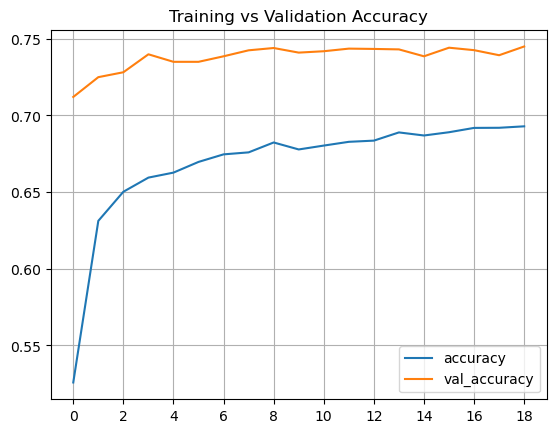

In [13]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')

plt.locator_params(axis='x', nbins=10)
plt.legend()
plt.grid(True)
plt.show()

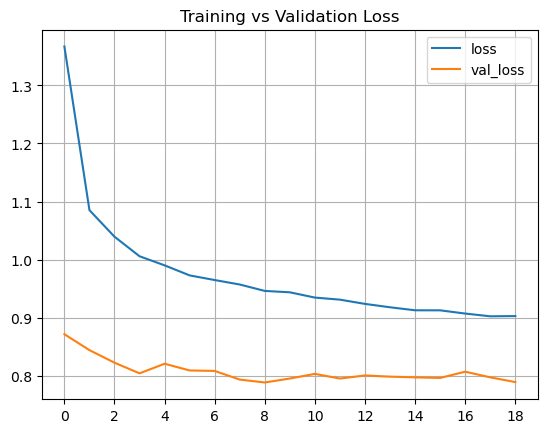

In [14]:
plt.title("Training vs Validation Loss")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

## Final model


Then validation set and train set is merged for final train for training the final model.

In [15]:
x_train_full = np.concatenate((train_features, val_features), axis=0)  # join train + val sets
y_train_full = np.concatenate((train_labels, val_labels), axis=0)

In [16]:
model = Sequential([
    layers.Input(shape=(4,4,2048)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
epochs = 40

callbacks = [keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.5, patience=5, min_lr=1e-6)]
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

history = model.fit(x_train_full,y_train_full, epochs=epochs,batch_size=64, verbose=1,callbacks=callbacks)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5448 - loss: 1.3208 - learning_rate: 0.0010
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6370 - loss: 1.0742 - learning_rate: 0.0010
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6540 - loss: 1.0347 - learning_rate: 0.0010
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6630 - loss: 1.0004 - learning_rate: 0.0010
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6677 - loss: 0.9865 - learning_rate: 0.0010
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6733 - loss: 0.9644 - learning_rate: 0.0010
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6776 - loss: 0.9549 - learning_rate: 0.0010
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6798 - loss: 0.9473 - learning_rate: 0.0010
Epoch 9/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6807 - loss: 0.9421 - learning_rate: 0.0010
Epoch 10/4

## Model validation

In [18]:
test_model = keras.models.load_model("finalModel.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7167 - loss: 0.8455
Test accuracy: 0.717
Test loss: 0.845


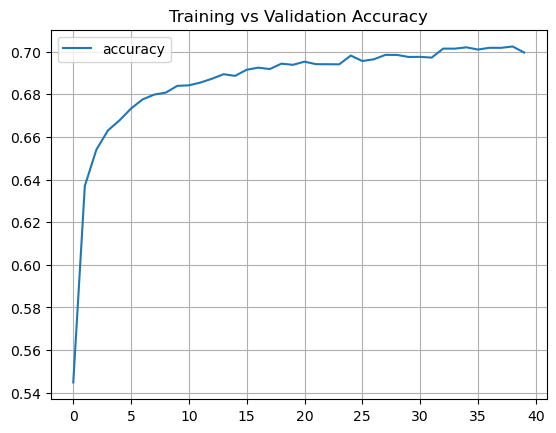

In [19]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history['accuracy'],label='accuracy')
plt.locator_params(axis='x', nbins=10)
plt.legend()
plt.grid(True)
plt.show()

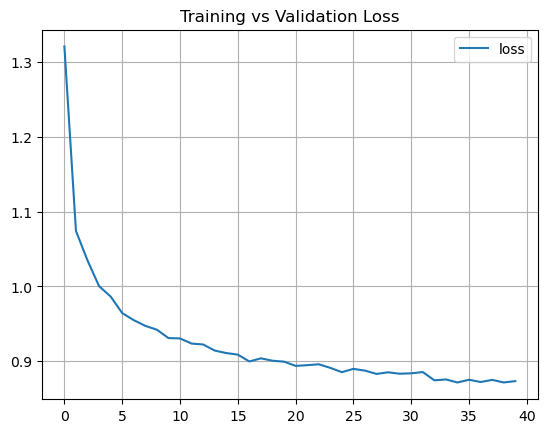

In [20]:
plt.title("Training vs Validation Loss")
plt.plot(history.history['loss'],label='loss')
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

## Evaluation
As we can see, when altering the last layers did not improve accuracy significantly
with first experimental layers results accuracy was: 0.7
<br>
Fine-tuned model with validation data:<br>
Test accuracy: 0.738
Test loss: 0.792

Fine-tuned model without validation data:<br>
Test accuracy: 0.717
Test loss: 0.845
